In [1]:
# Importing Required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, confusion_matrix, classification_report, accuracy_score

import warnings

warnings.filterwarnings('ignore')

In [2]:
# Read dataset
df = pd.read_csv(r"/content/mushroom.csv")
pd.set_option('display.max_column',25)
df

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1
...,...,...,...,...,...,...,...,...,...
54030,73,5,3,2,0.887740,569,12,0.943195,1
54031,82,2,3,2,1.186164,490,12,0.943195,1
54032,82,5,3,2,0.915593,584,12,0.888450,1
54033,79,2,3,2,1.034963,491,12,0.888450,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [4]:
df.isnull().sum()

,0
cap-diameter,0
cap-shape,0
gill-attachment,0
gill-color,0
stem-height,0
stem-width,0
stem-color,0
season,0
class,0


In [5]:
df.duplicated().sum()

303

In [6]:
df.drop_duplicates(inplace=True)

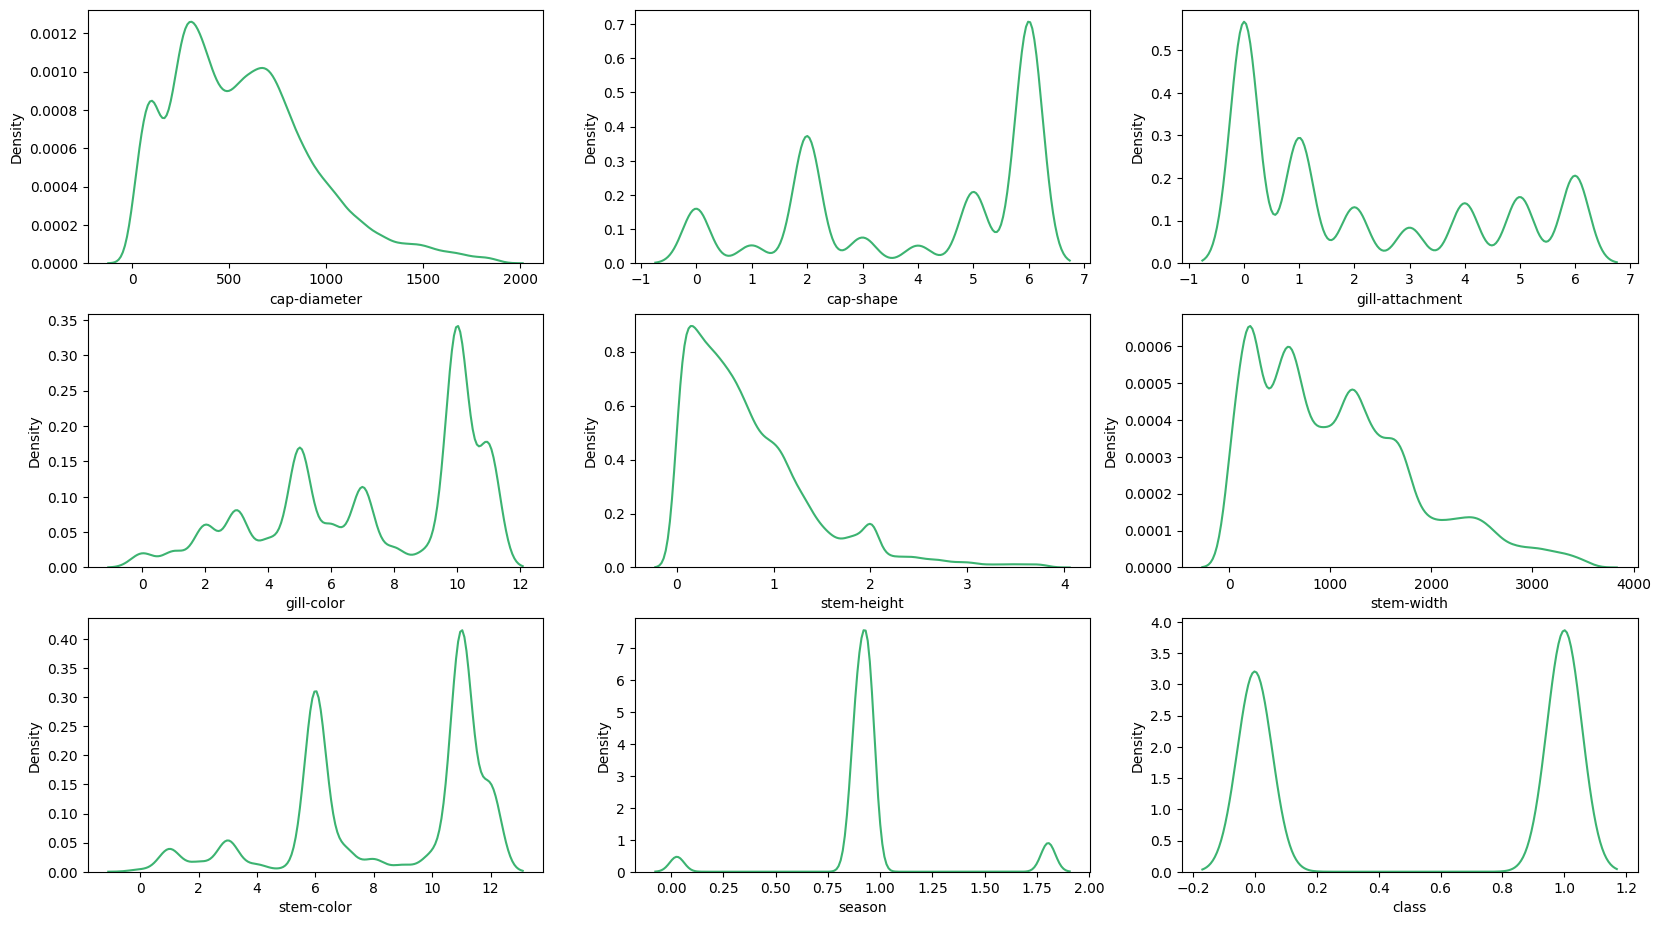

In [7]:
fig = plt.figure (figsize = [20 ,27])

for i in enumerate (df):


        plt.subplot(7,3,i[0]+1)
        sns.kdeplot(x = i[1],data = df , color='#3CB371')
    # print(i)

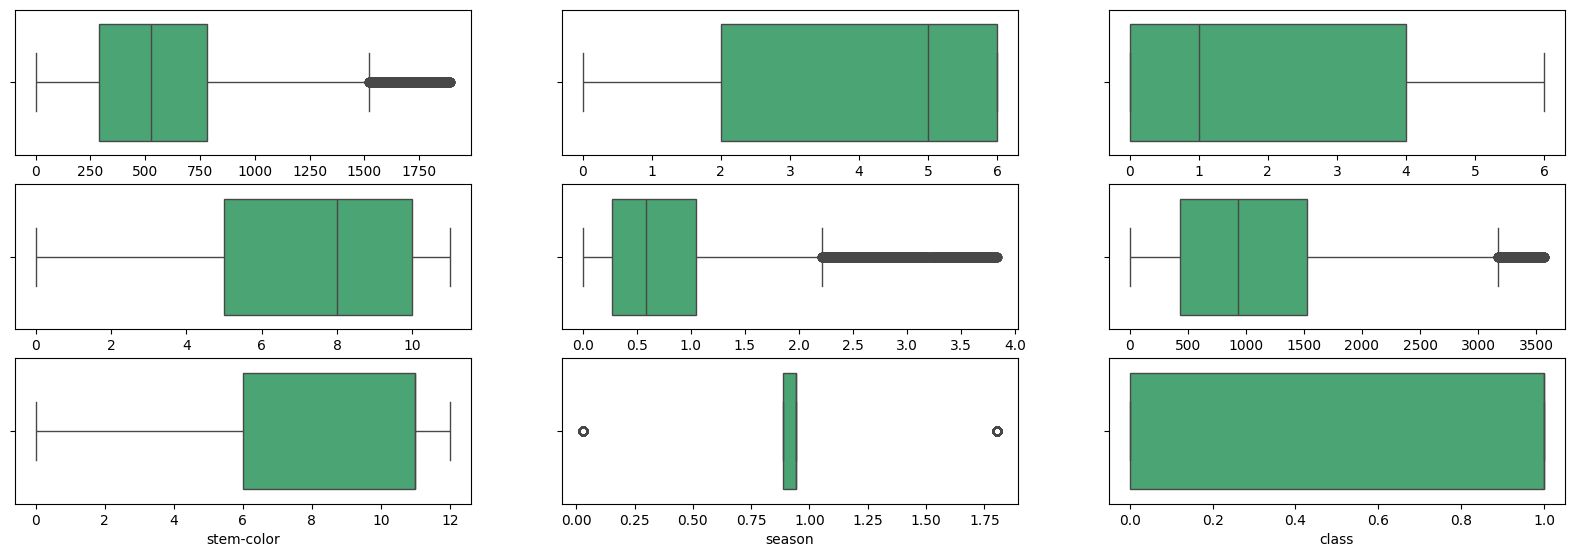

In [8]:
fig = plt.figure (figsize = [20,20])
# cat=['3D_available','Genre','Start_Tech_Oscar']
for i in enumerate (df):

        plt.subplot(9,3,i[0]+1)
        sns.boxplot(x = i[1],data = df , color='#3CB371')


In [9]:
# List of columns to skip
skip_columns = [
    'season'
]

# Iterate over each column in the DataFrame
for column in df.columns:
    # Skip columns in the skip_columns list
    if column in skip_columns:
        continue

    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Compute the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Define the maximum and minimum thresholds for outliers
    Maximum = Q3 + 1.5 * IQR
    Minimum = Q1 - 1.5 * IQR

    # Use vectorized operations to replace outliers with the thresholds
    df[column] = np.where(df[column] > Maximum, Maximum,
                          np.where(df[column] < Minimum, Minimum, df[column]))


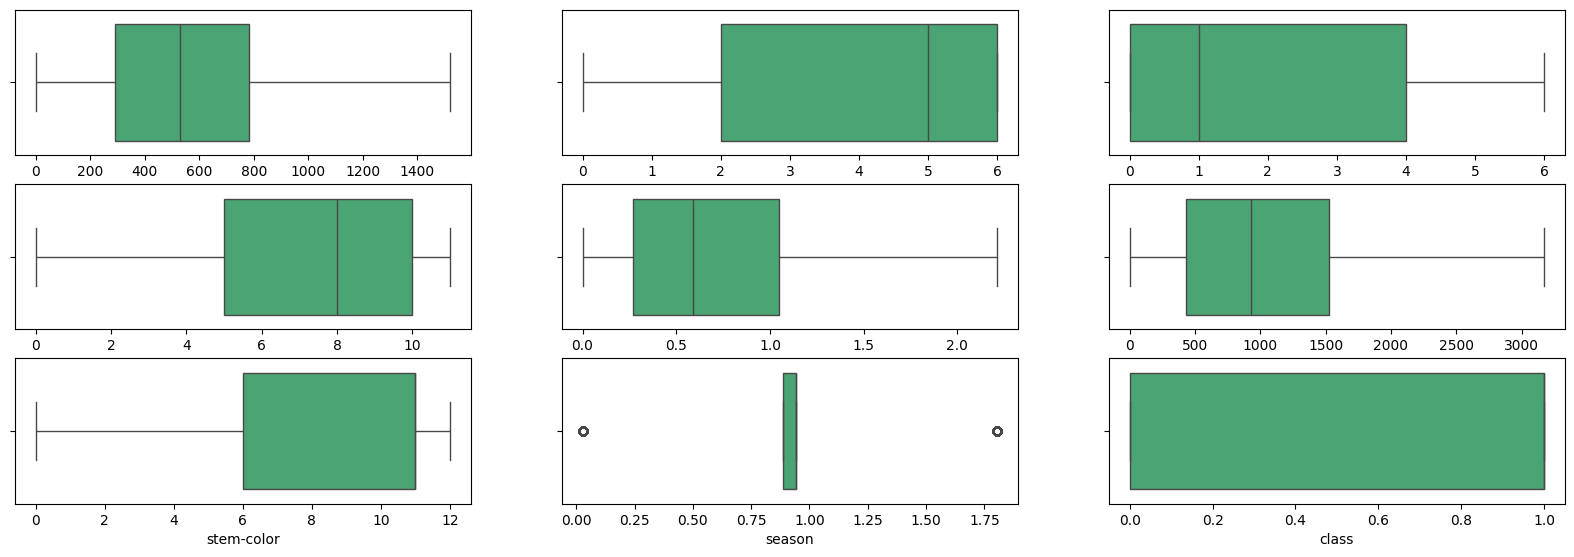

In [10]:
fig = plt.figure (figsize = [20,20])
# cat=['3D_available','Genre','Start_Tech_Oscar']
for i in enumerate (df):

        plt.subplot(9,3,i[0]+1)
        sns.boxplot(x = i[1],data = df , color='#3CB371')


In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# List of columns to exclude from scaling
exclude_columns = ['cap-shape','gill-attachment','gill-color','stem-color','class']

# Separate the columns
columns_to_scale = [col for col in df.columns if col not in exclude_columns]

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the columns to be scaled
scaler.fit(df[columns_to_scale])

# Transform the columns to be scaled
scaled_values = scaler.transform(df[columns_to_scale])

# Create a DataFrame with the scaled values
df_scaled = pd.DataFrame(scaled_values, index=df.index, columns=columns_to_scale)

# Combine the scaled columns with the unscaled columns
df_unscaled = df[exclude_columns]
df_combined = pd.concat([df_scaled, df_unscaled], axis=1)

# Ensure the combined DataFrame has the same column order as the original
df = df_combined[df.columns]


In [12]:
df

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,2.286388,2.0,2.0,10.0,2.543750,0.633675,11.0,2.804390,1.0
1,2.538853,2.0,2.0,10.0,2.543750,0.649185,11.0,2.804390,1.0
2,2.283551,2.0,2.0,10.0,2.543750,0.660818,11.0,2.804390,1.0
3,1.971516,6.0,2.0,10.0,2.543750,0.660818,11.0,2.804390,1.0
4,2.096330,6.0,2.0,10.0,2.543750,0.528984,11.0,-0.030044,1.0
...,...,...,...,...,...,...,...,...,...
54030,-1.398468,5.0,3.0,2.0,0.268014,-0.627794,12.0,-0.030044,1.0
54031,-1.372938,2.0,3.0,2.0,0.780843,-0.729901,12.0,-0.030044,1.0
54032,-1.372938,5.0,3.0,2.0,0.315878,-0.608407,12.0,-0.210247,1.0
54033,-1.381448,2.0,3.0,2.0,0.521010,-0.728608,12.0,-0.210247,1.0


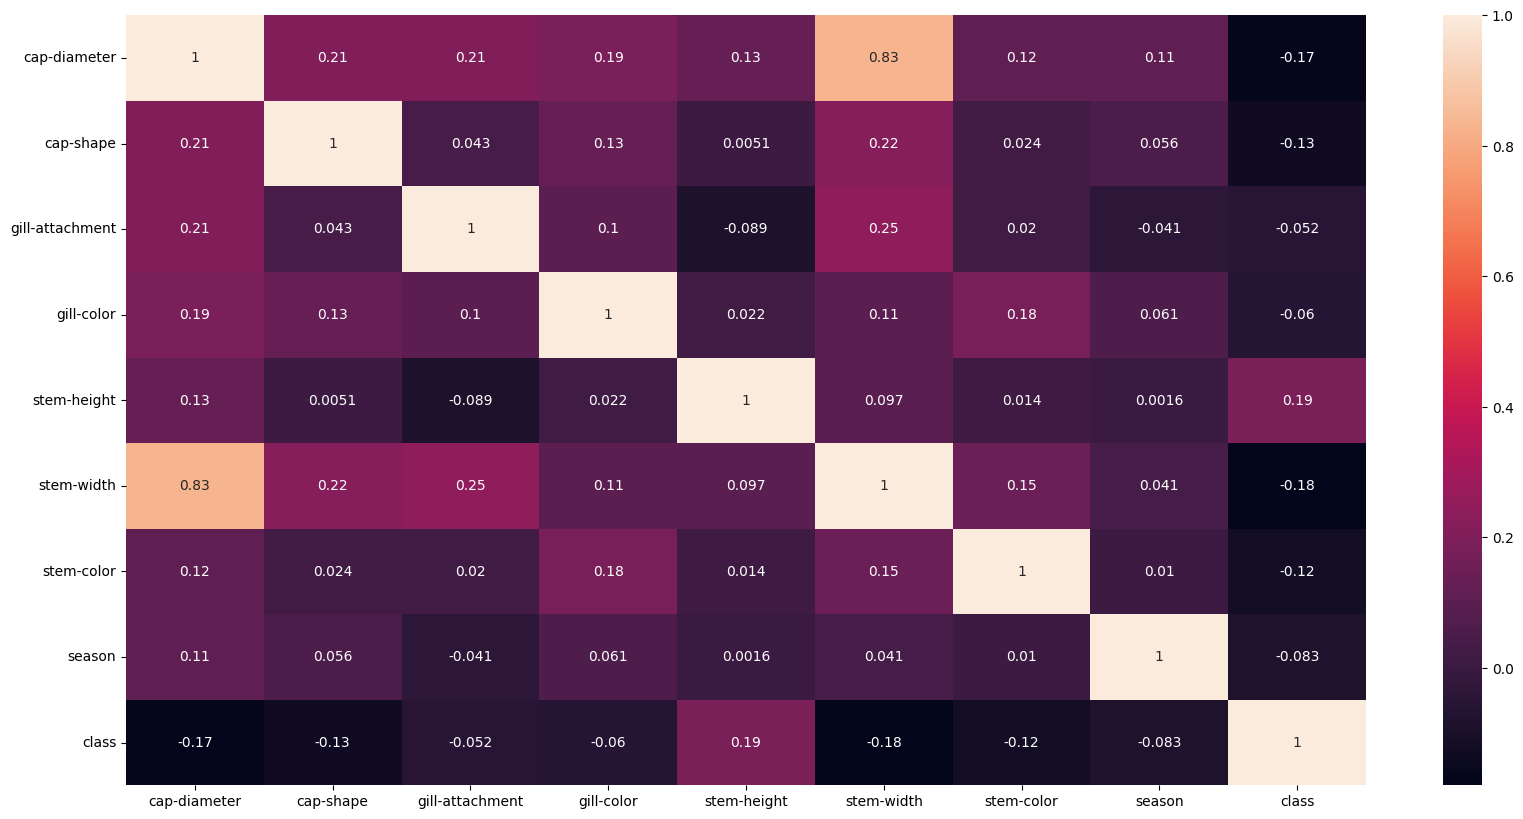

In [13]:
# Checking for Correlation

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [14]:
x = df.drop('class',axis=1)
y = df['class']

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# DT

In [16]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
dt.score(x_test,y_test)

0.978133432585838

In [17]:
from sklearn.svm import SVC

In [18]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear']
              }

In [19]:
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=2,verbose=3)

In [20]:
grid.fit(x_train,y_train)

Fitting 2 folds for each of 15 candidates, totalling 30 fits
[CV 1/2] END .....C=0.1, gamma=1, kernel=linear;, score=0.644 total time=  28.5s
[CV 2/2] END .....C=0.1, gamma=1, kernel=linear;, score=0.637 total time=  28.1s
[CV 1/2] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.644 total time=  28.9s
[CV 2/2] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.637 total time=  27.9s
[CV 1/2] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.644 total time=  28.0s
[CV 2/2] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.637 total time=  28.1s
[CV 1/2] END .C=0.1, gamma=0.001, kernel=linear;, score=0.644 total time=  28.1s
[CV 2/2] END .C=0.1, gamma=0.001, kernel=linear;, score=0.637 total time=  28.1s
[CV 1/2] END C=0.1, gamma=0.0001, kernel=linear;, score=0.644 total time=  28.1s
[CV 2/2] END C=0.1, gamma=0.0001, kernel=linear;, score=0.637 total time=  27.9s
[CV 1/2] END .......C=1, gamma=1, kernel=linear;, score=0.644 total time=  49.9s
[CV 2/2] END .......C=1, gamma=1, kernel=linear;

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [21]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'linear'}

In [22]:
svc = SVC(C=1, gamma=1, kernel='linear')
svc.fit(x_train,y_train)
y_pred_svc = svc.predict(x_test)
svc.score(x_test,y_test)


0.6270587140597376

In [26]:
# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred_svc)
print(f'Mean Absolute Error: {mae}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svc)
print('Confusion Matrix:')
print(cm)

# Classification Report
cr = classification_report(y_test, y_pred_svc)
print('Classification Report:')
print(cr)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred_svc)
print(f'Accuracy Score: {accuracy}')


Mean Absolute Error: 0.3729412859402624
Confusion Matrix:
[[2686 2097]
 [1911 4053]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.58      0.56      0.57      4783
         1.0       0.66      0.68      0.67      5964

    accuracy                           0.63     10747
   macro avg       0.62      0.62      0.62     10747
weighted avg       0.63      0.63      0.63     10747

Accuracy Score: 0.6270587140597376
